In [1]:
import pandas as pd
# 读取heart数据集
df = pd.read_csv("./data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [2]:
# 查看各特征值列中的缺失值信息
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [3]:
# 缺失值处理*
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [4]:
# 将thal列 数据映射到 0, 1 , 2
df.replace({"thal" : {3:0,6:1,7:2}},inplace=True)
# 将target 映射为 0，1 二分类
df.replace({"target" : {1:1,2:1,3:1,4:1}},inplace=True)

In [5]:
'''特征工程'''
# 修改列名
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar','rest_ecg','max_heart_rate',
'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
# 将定类特征由整数编码转为实际对应的字符串
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical_angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical_angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-angina_pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = '<120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = '>120mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left_heart_big'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 1] = 'up'
df['st_slope'][df['st_slope'] == 2] = 'normal'
df['st_slope'][df['st_slope'] == 3] = 'down'

df['thalassemia'][df['thalassemia'] == 0] = 'normal'
df['thalassemia'][df['thalassemia'] == 1] = 'fixed'
df['thalassemia'][df['thalassemia'] == 2] = 'reversable'

df.head()

/tmp/ipykernel_66991/428630235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][df['sex'] == 0] = 'female'
/tmp/ipykernel_66991/428630235.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical_angina'
/tmp/ipykernel_66991/428630235.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = '<120mg/ml'
/tmp/ipyker

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63.0,male,typical_angina,145.0,233.0,>120mg/ml,left_heart_big,150.0,no,2.3,down,0.0,6.0,0
1,67.0,male,asymptomic,160.0,286.0,<120mg/ml,left_heart_big,108.0,yes,1.5,normal,3.0,3.0,1
2,67.0,male,asymptomic,120.0,229.0,<120mg/ml,left_heart_big,129.0,yes,2.6,normal,2.0,7.0,1
3,37.0,male,non-angina_pain,130.0,250.0,<120mg/ml,normal,187.0,no,3.5,down,0.0,3.0,0
4,41.0,female,atypical_angina,130.0,204.0,<120mg/ml,left_heart_big,172.0,no,1.4,up,0.0,3.0,0


In [7]:
'''将离散的定类和定序特征序列转为One-Hot编码'''
df = pd.get_dummies(df)
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,target,sex_female,sex_male,chest_pain_type_asymptomic,chest_pain_type_atypical_angina,...,st_slope_up,num_major_vessels_0.0,num_major_vessels_1.0,num_major_vessels_2.0,num_major_vessels_3.0,num_major_vessels_?,thalassemia_3.0,thalassemia_6.0,thalassemia_7.0,thalassemia_?
0,63.0,145.0,233.0,150.0,2.3,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,67.0,160.0,286.0,108.0,1.5,1,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0
2,67.0,120.0,229.0,129.0,2.6,1,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
3,37.0,130.0,250.0,187.0,3.5,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,41.0,130.0,204.0,172.0,1.4,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0,0


In [9]:
'''划分训练集和测试集'''
y = df.target
X = df.drop(['target'], axis=1)

import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [10]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5 , n_estimators=100, random_state=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=5)

In [11]:
model.score(X_train, y_train)

0.9338842975206612

In [15]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pred = model.predict(X_test)
# 准确率
print("准确率：" + str(accuracy_score(y_test, y_pred)))
# 精确率
print("精确率：" + str(precision_score(y_test, y_pred)))
# # 召回率
print("召回率：" + str(recall_score(y_test, y_pred)))
# # F1值
print("F1值： " + str(f1_score(y_test, y_pred)))

准确率：0.8360655737704918
精确率：0.8571428571428571
召回率：0.8
F1值： 0.8275862068965518


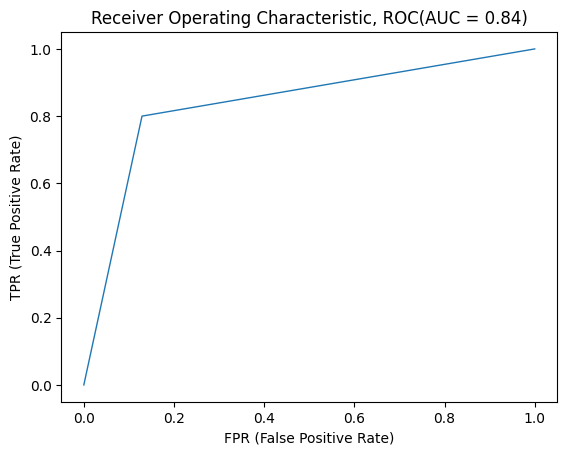

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# y_test：实际的标签, dataset_pred：预测的概率值。
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr) 
#画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数能计算出来 
plt.plot(fpr, tpr, lw=1, label='ROC(area = %0.2f)' % (roc_auc))
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.title("Receiver Operating Characteristic, ROC(AUC = %0.2f)"% (roc_auc))
plt.show()